# Bank Loan Analysis

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [4]:
df=pd.read_excel("C:/Users/Prathmesh/Downloads/financial_loan.xlsx")

### Metadata Of Data

In [5]:
print("Number of rows:", df.shape[0])

Number of rows: 38576


In [6]:
print("Number of columns:", df.shape[1])

Number of columns: 24


### Total Loan Application

In [7]:
total_loan_application=df['id'].count()
print("Total Loan Application:",total_loan_application)

Total Loan Application: 38576


### MTD Total Loan Application

In [11]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_application= mtd_data['id'].count()
print(f"MTD Loan Aplliction for {latest_issue_date.strftime('%B %Y')}:{mtd_loan_application}")

MTD Loan Aplliction for December 2021:4314


### Total Funded Amount

In [16]:
total_funded_amount=df['loan_amount'].sum()
total_funded_amount_millions= total_funded_amount/1000000
print("Total Funded Amount ${:.2f}M". format(total_funded_amount_millions))

Total Funded Amount $435.76M


### MTD Total Funded Amount

In [26]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]


mtd_total_funded_amount=mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions=mtd_total_funded_amount/1000000

print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


### Total Amount Received

In [27]:
total_amount_received=df['total_payment'].sum()
total_amount_received_millions=total_amount_received/1000000
print("Total Amount Received: ${:.2f}M".format(total_amount_received_millions))

Total Amount Received: $473.07M


### MTD Total Amount Received

In [28]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]


mtd_total_received_amount=mtd_data['total_payment'].sum()
mtd_total_received_amount_millions=mtd_total_received_amount/1000000

print("MTD Total Received Amount: ${:.2f}M".format(mtd_total_received_amount_millions))

MTD Total Received Amount: $58.07M


### Average Interest Rate


In [42]:
average_interest_rate=df['int_rate'].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


### Average DTI Ratio

In [41]:
average_dti_ratio=df['dti'].mean()*100
print("Average DTI Ratio: {:.2f}%".format(average_dti_ratio))

Average DTI Ratio: 13.33%


### Good Loan Metrics¶

In [51]:
good_loan=df[df['loan_status'].isin(["Fully Paid","Current"])]

total_loan_applications=df['id'].count()

good_loan_applications=good_loan['id'].count()
good_loan_funded_amount=good_loan['loan_amount'].sum()
good_loan_received_amount=good_loan['total_payment'].sum()

good_loan_funded_amount_millions=good_loan_funded_amount/1000000
good_loan_received_amount_millions=good_loan_received_amount/1000000

good_loan_percentage=good_loan_applications/total_loan_applications*100

print("Good Loan Applications:",good_loan_applications)
print("Good Loan Funded Amount:${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received:${:.2f}M".format(good_loan_received_amount_millions))
print("Percentage Of Good Loan Application:{:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount:$370.22M
Good Loan Total Received:$435.79M
Percentage Of Good Loan Application:86.18%


### Bad Loan Metrics

In [54]:
bad_loan=df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications=df['id'].count()

bad_loan_applications=bad_loan['id'].count()
bad_loan_funded_amount=bad_loan['loan_amount'].sum()
bad_loan_received_amount=bad_loan['total_payment'].sum()

bad_loan_funded_amount_millions=bad_loan_funded_amount/1000000
bad_loan_received_amount_millions=bad_loan_received_amount/1000000

bad_loan_percentage=bad_loan_applications/total_loan_applications*100

print("bad Loan Applications:",bad_loan_applications)
print("bad Loan Funded Amount:${:.2f}M".format(bad_loan_funded_amount_millions))
print("bad Loan Total Received:${:.2f}M".format(bad_loan_received_amount_millions))
print("Percentage Of Good Loan Application:{:.2f}%".format(bad_loan_percentage))

bad Loan Applications: 5333
bad Loan Funded Amount:$65.53M
bad Loan Total Received:$37.28M
Percentage Of Good Loan Application:13.82%


### Monthly Trends By Issue Date For Total Funded Amount

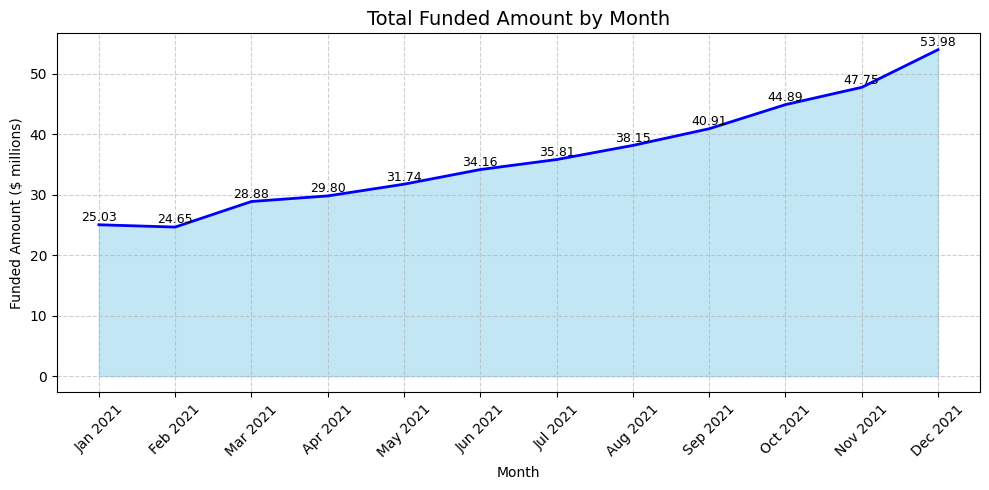

In [64]:
monthly_funded=(
 df.sort_values('issue_date')
   .assign(month_name=lambda x:x['issue_date'].dt.strftime('%b %Y'))
   .groupby('month_name', sort=False)['loan_amount']  
   .sum()
   .div(1000000)  
   .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'],color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions']+0.1,f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ millions)')
plt.xticks(ticks=range(len(monthly_funded)), label=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
    

### Monthly Trends by Issue Date for Total Amount Received

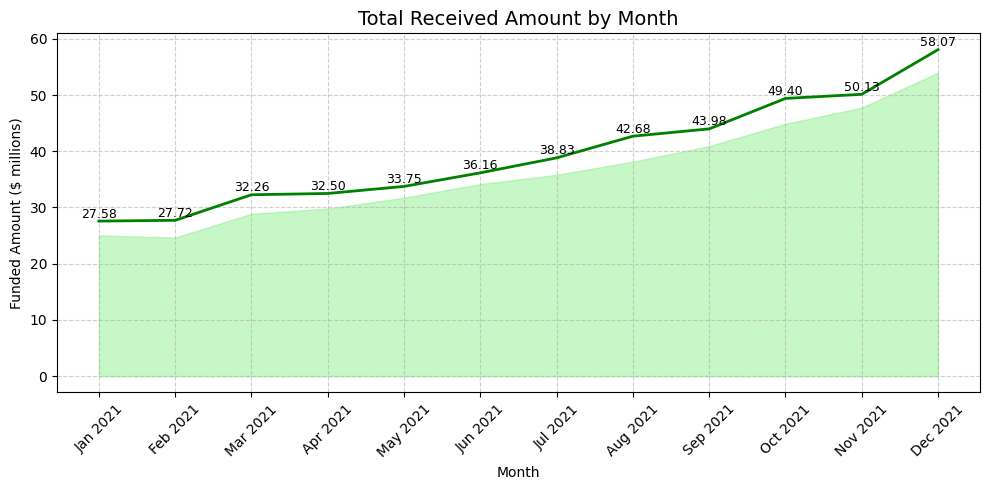

In [66]:
monthly_received=(
 df.sort_values('issue_date')
   .assign(month_name=lambda x:x['issue_date'].dt.strftime('%b %Y'))
   .groupby('month_name', sort=False)['total_payment']  
   .sum()
   .div(1000000)  
   .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['loan_amount_millions'],color='green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i,row['loan_amount_millions']+0.1,f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ millions)')
plt.xticks(ticks=range(len(monthly_received)), label=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
    

### Monthly Trends by Issue Date for Total Loan Application

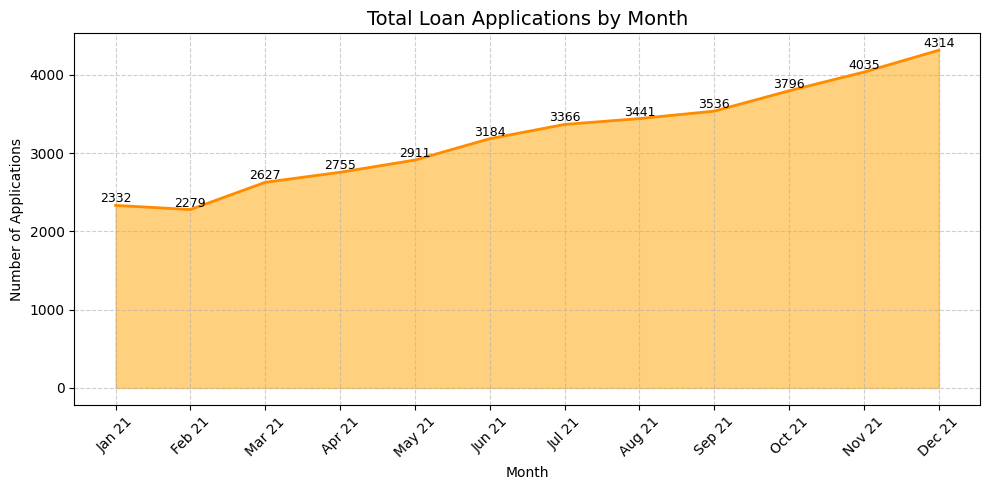

In [67]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
         color='darkorange', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Regional Analysis by State for Total Funded Amount

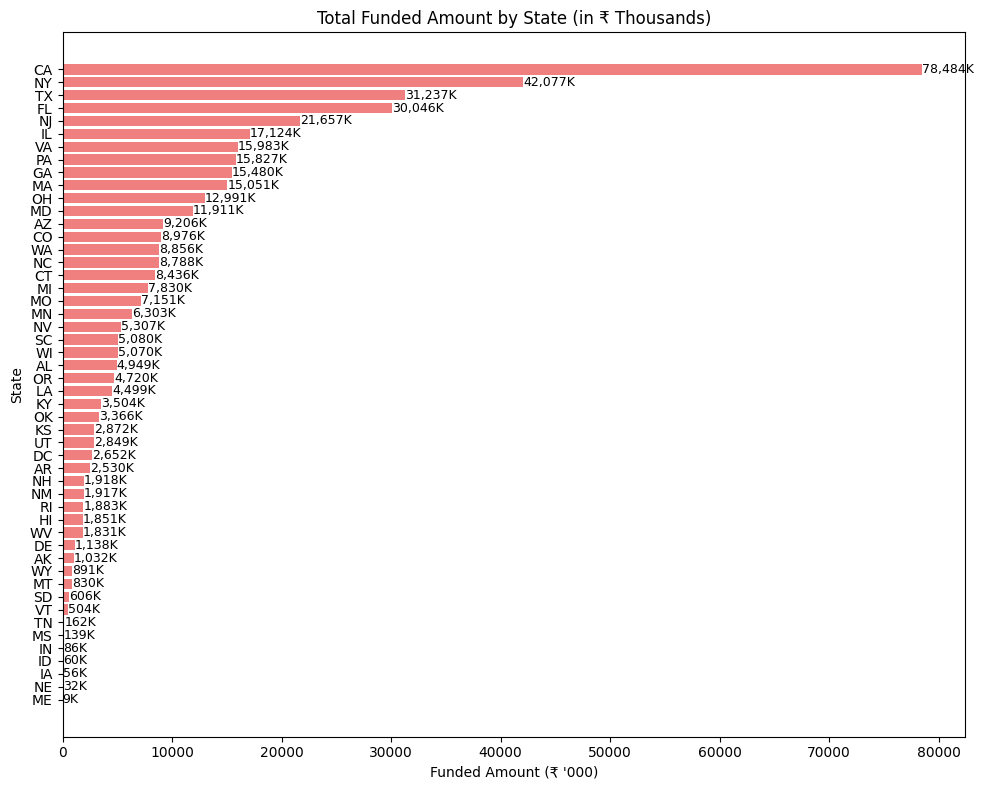

In [68]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


### Long Term Analysis by Total funded Amount

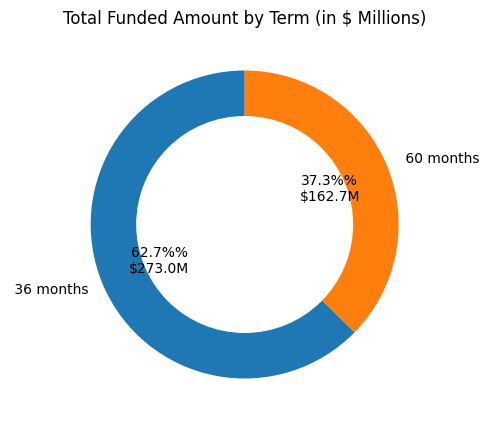

In [69]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()


### Employee Length by Total Funded Amount

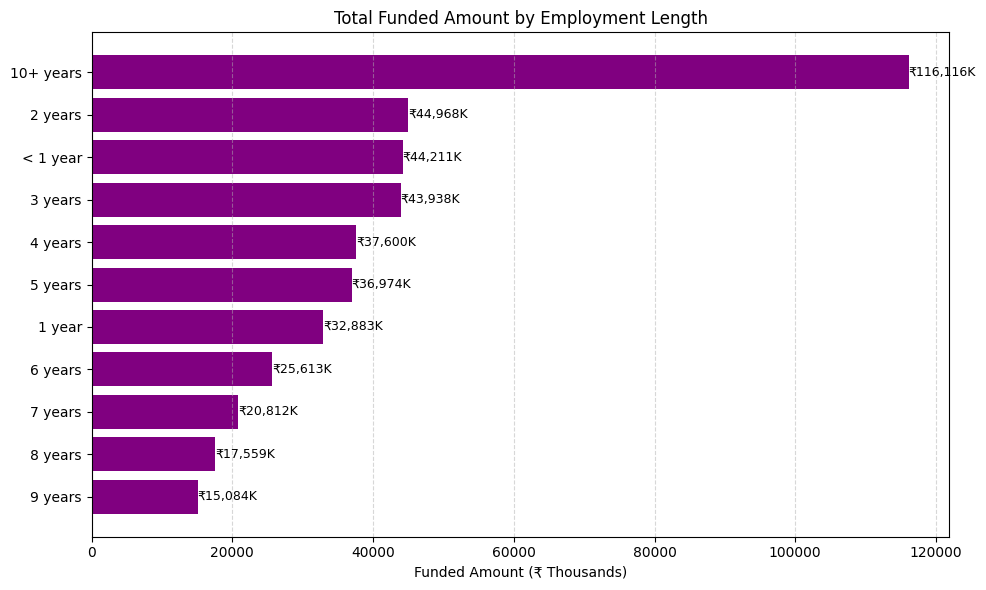

In [70]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding, color='purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"₹{width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### loan Purpose by Total Funded Amount

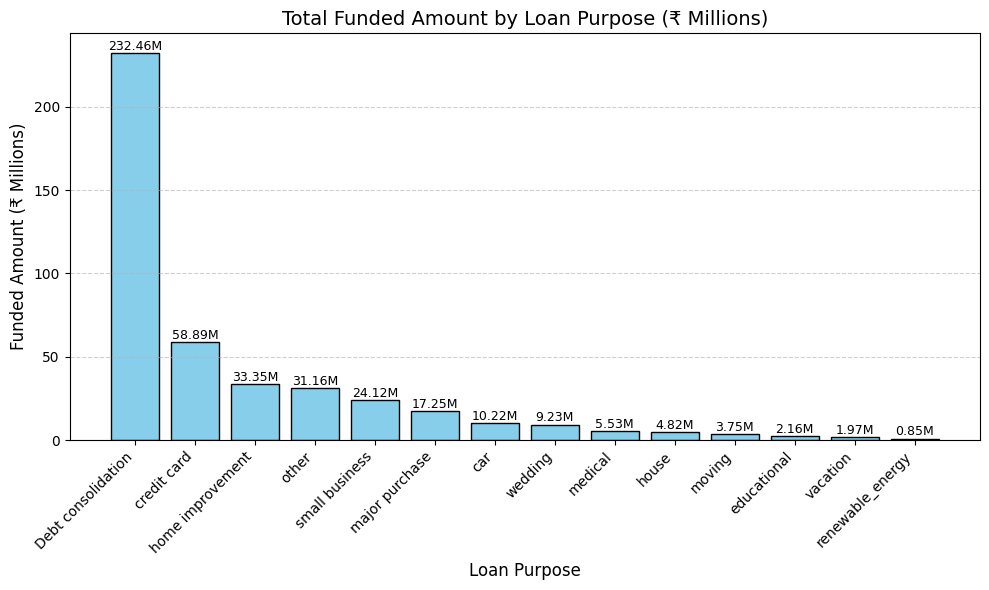

In [72]:
# Group and aggregate the data
purpose_funding_millions = (
    df.groupby('purpose')['loan_amount'].sum().sort_values(ascending=False) / 1_000_000
)

# Create the figure
plt.figure(figsize=(10, 6))

# Create a vertical bar chart
bars = plt.bar(
    purpose_funding_millions.index,
    purpose_funding_millions.values,
    color='skyblue',
    edgecolor='black'
)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f'{height:.2f}M', ha='center', va='bottom', fontsize=9)

# Add titles and labels
plt.title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Funded Amount (₹ Millions)', fontsize=12)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Home Ownership by Total Amount Funded

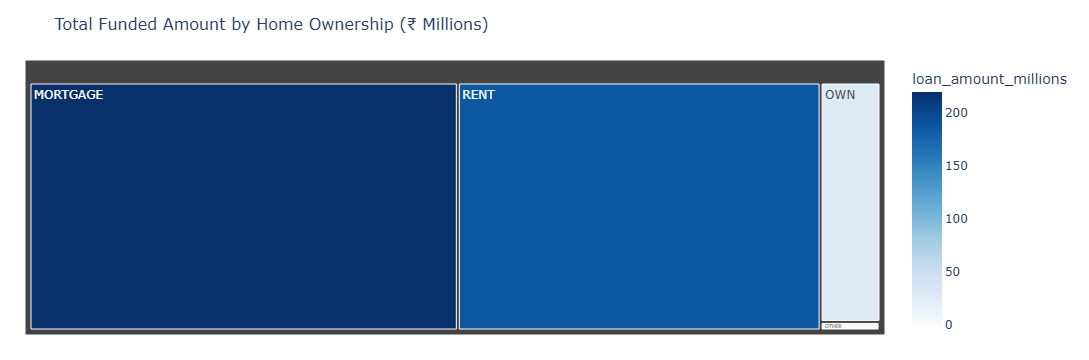

In [73]:
import plotly.express as px

# Group and prepare data
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000

# Create improved treemap
fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    hover_data={'loan_amount_millions': ':.2f'},
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.update_layout(
    title_font_size=16,
    margin=dict(t=60, l=25, r=25, b=25)
)

fig.show()
